# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 564


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | quellon
Processing Record 6 of Set 1 | tibiri
Processing Record 7 of Set 1 | kurchatov
Processing Record 8 of Set 1 | bulakamba
Processing Record 9 of Set 1 | flying fish cove
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | haenam
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | petrovsk-zabaykal'skiy
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | bubaque
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | howrah
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | matour

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.84,95,100,18.99,TF,1732400778
1,waitangi,-43.9535,-176.5597,11.57,77,76,4.92,NZ,1732400778
2,lihue,21.9789,-159.3672,25.97,65,0,3.60,US,1732400794
3,grytviken,-54.2811,-36.5092,8.45,87,100,6.32,GS,1732400775
4,quellon,-43.1167,-73.6167,11.18,89,99,0.60,CL,1732400865


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.84,95,100,18.99,TF,1732400778
1,waitangi,-43.9535,-176.5597,11.57,77,76,4.92,NZ,1732400778
2,lihue,21.9789,-159.3672,25.97,65,0,3.60,US,1732400794
3,grytviken,-54.2811,-36.5092,8.45,87,100,6.32,GS,1732400775
4,quellon,-43.1167,-73.6167,11.18,89,99,0.60,CL,1732400865


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

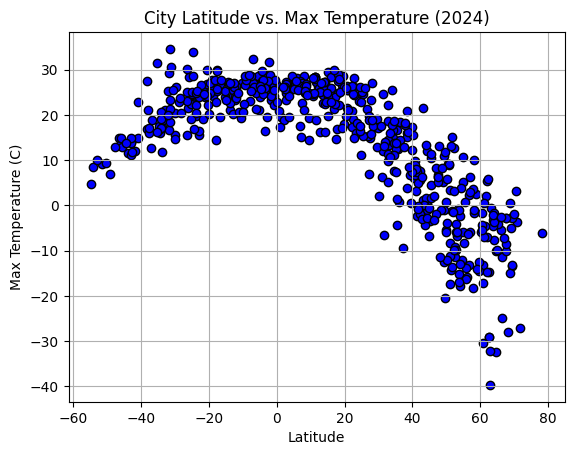

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.loc[:,"Lat"], city_data_df.loc[:,"Max Temp"], facecolors = "blue", edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

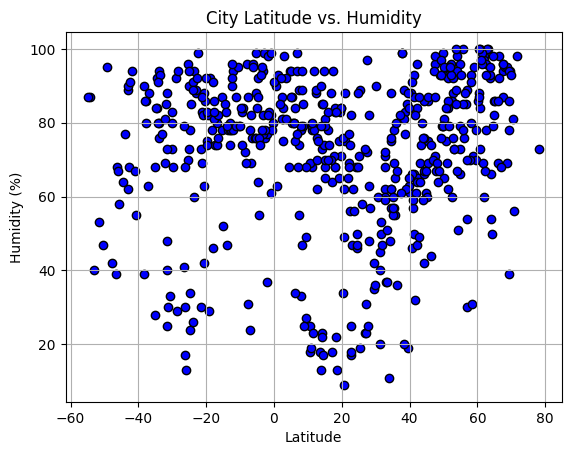

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.loc[:,"Lat"], city_data_df.loc[:,"Humidity"], facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

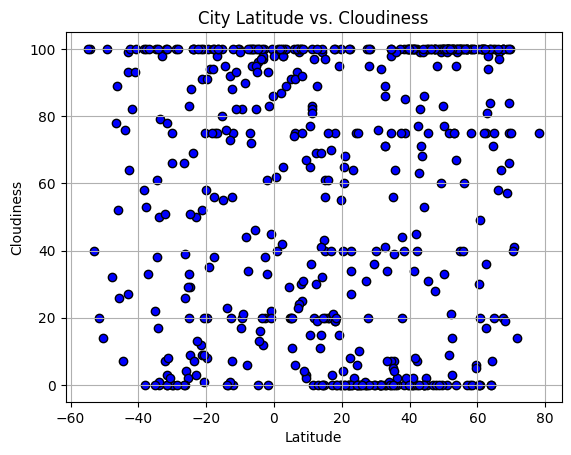

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.loc[:,"Lat"], city_data_df.loc[:,"Cloudiness"], facecolors="blue", edgecolors="black" )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

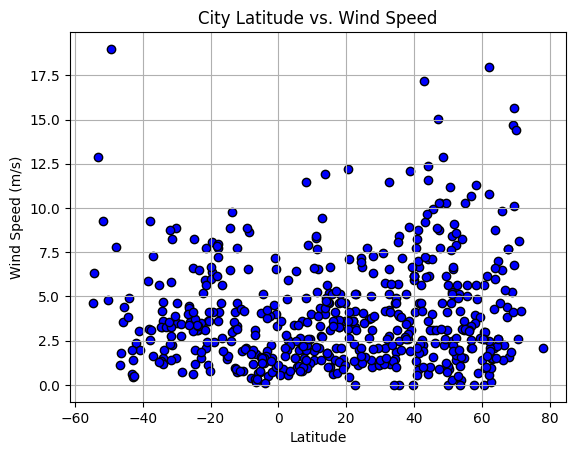

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df.loc[:,"Lat"], city_data_df.loc[:,"Wind Speed"], facecolor="blue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def regress_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    regress_plot.line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    print(f"The r-value is: {rvalue}")

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lihue,21.9789,-159.3672,25.97,65,0,3.60,US,1732400794
5,tibiri,13.5627,7.0485,22.69,18,11,4.25,NE,1732400865
6,kurchatov,51.6601,35.6521,-1.18,85,100,6.56,RU,1732400865
9,haenam,34.5711,126.5989,7.57,62,98,1.87,KR,1732400865
11,petropavlovsk-kamchatsky,53.0452,158.6483,-6.67,73,75,2.00,RU,1732400781


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.84,95,100,18.99,TF,1732400778
1,waitangi,-43.9535,-176.5597,11.57,77,76,4.92,NZ,1732400778
3,grytviken,-54.2811,-36.5092,8.45,87,100,6.32,GS,1732400775
4,quellon,-43.1167,-73.6167,11.18,89,99,0.60,CL,1732400865
7,bulakamba,-6.8748,108.9559,26.34,82,100,3.08,ID,1732400655


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8555103642277584


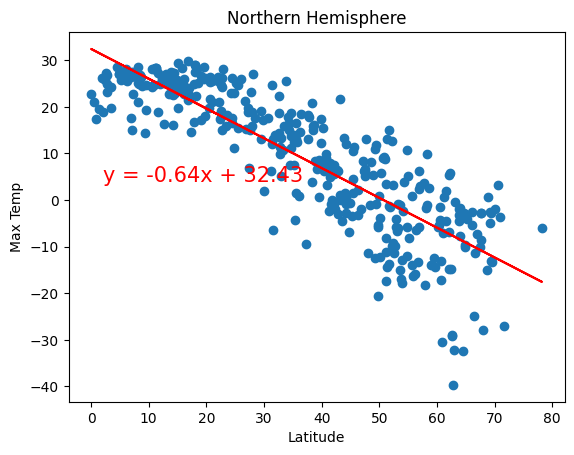

In [21]:
# Linear regression on Northern Hemisphere
regress_plot(northern_hemi_df.loc[:, "Lat"], northern_hemi_df.loc[:,"Max Temp"])
plt.annotate(regress_plot.line_eq, (2,4), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere")
plt.show()

The r-value is: 0.6814370321916065


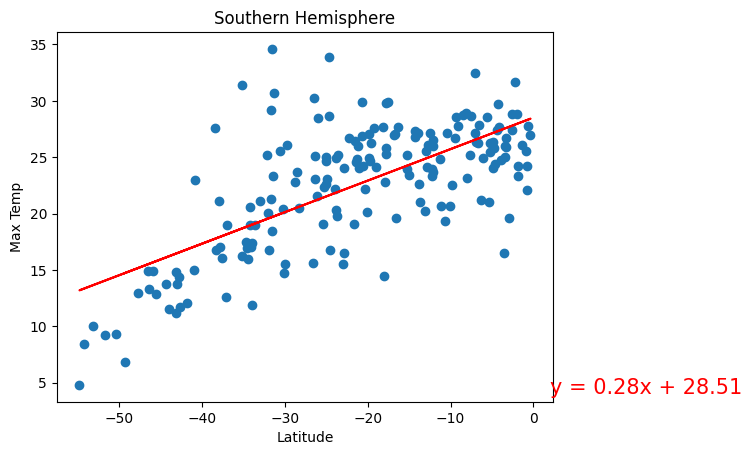

In [23]:
# Linear regression on Southern Hemisphere
regress_plot(southern_hemi_df.loc[:, "Lat"], southern_hemi_df.loc[:,"Max Temp"])
plt.annotate(regress_plot.line_eq, (2,4), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.8555103642277584


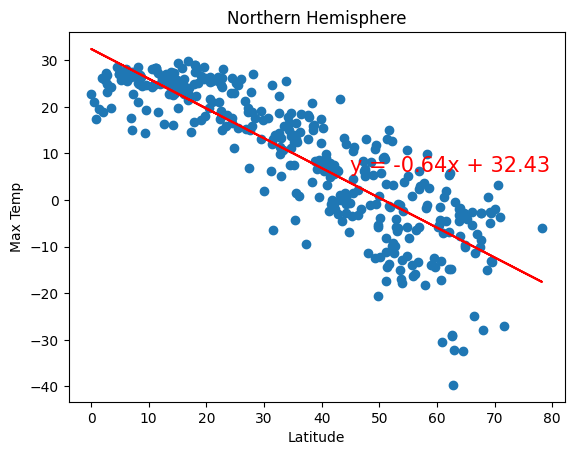

In [28]:
# Northern Hemisphere
regress_plot(northern_hemi_df.loc[:,"Lat"], northern_hemi_df.loc[:,"Humidity"])
plt.annotate(regress_plot.line_eq, (45,6),fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere")
plt.show()

The r-value is: 0.20680583091868812


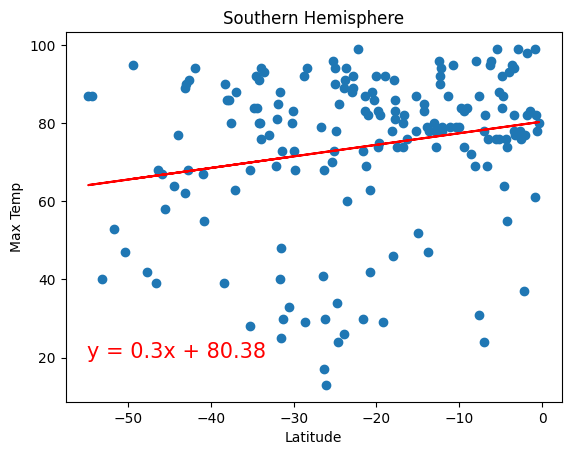

In [32]:
# Southern Hemisphere
regress_plot(southern_hemi_df.loc[:, "Lat"], southern_hemi_df.loc[:,"Humidity"])
plt.annotate(regress_plot.line_eq, (-55,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1849313525792827


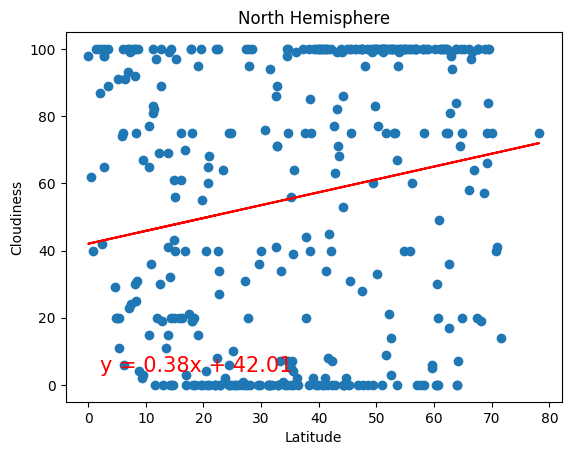

In [33]:
# Northern Hemisphere
regress_plot(northern_hemi_df.loc[:, "Lat"], northern_hemi_df.loc[:,"Cloudiness"])
plt.annotate(regress_plot.line_eq, (2,4), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("North Hemisphere")
plt.show()

The r-value is: 0.08565954803042443


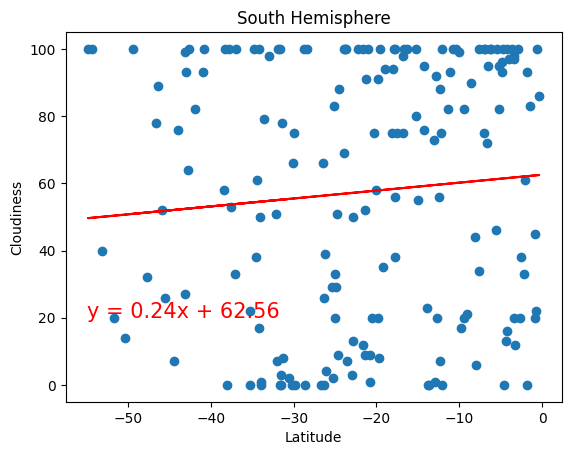

In [34]:
# Southern Hemisphere
regress_plot(southern_hemi_df.loc[:, "Lat"], southern_hemi_df.loc[:, "Cloudiness"])
plt.annotate(regress_plot.line_eq, (-55,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("South Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE